<a href="https://colab.research.google.com/github/sanikaijantakar/ML_Journal/blob/main/Polynomial_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

In [2]:
df = pd.read_csv('testdata.csv')
df.head()

,Sl. No,Temperature,Preasure
0,1,2,0.0002
1,2,20,0.0012
2,3,40,0.0060
3,4,60,0.0300
4,5,80,0.0900


In [3]:
temperature = df.iloc[:, 1:2].values #Input
preasure = df.iloc[:, 2].values #output

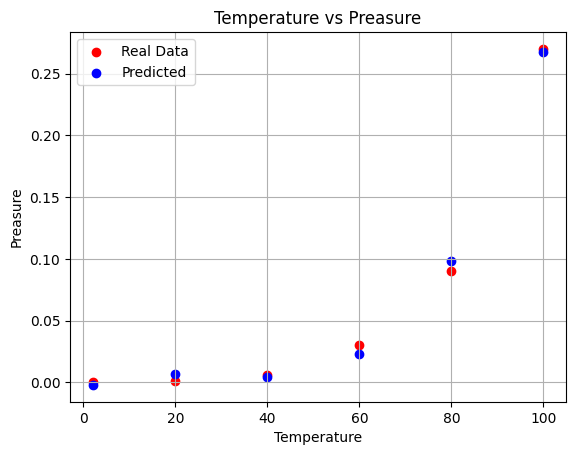

In [4]:
polyreg = PolynomialFeatures(degree=3)
X_poly = polyreg.fit_transform(temperature) #Transforming the input data into polynomial features
linreg = LinearRegression()
linreg.fit(X_poly, preasure) #Fitting the model with the transformed data
#Predicting the output with the transformed input data
predicted_preasure = linreg.predict(X_poly)

#Visualising the results
plt.scatter(temperature, preasure, color='red')
plt.scatter(temperature, predicted_preasure, color='blue')
plt.title('Temperature vs Preasure')
plt.xlabel('Temperature')
plt.ylabel('Preasure')
plt.legend(['Real Data', 'Predicted'])
plt.grid()
plt.show()

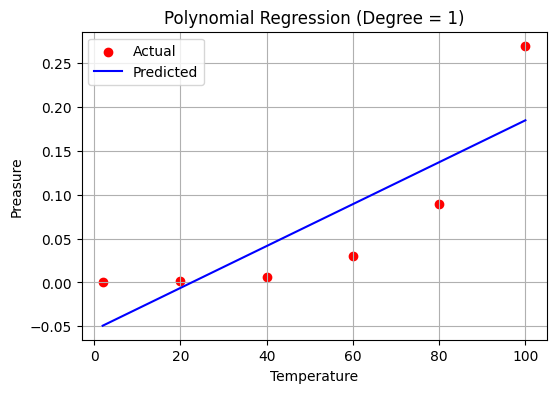

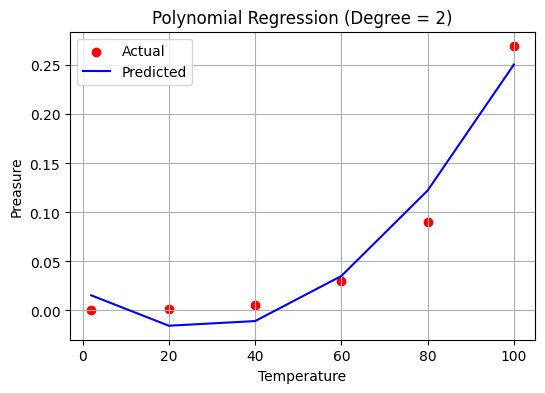

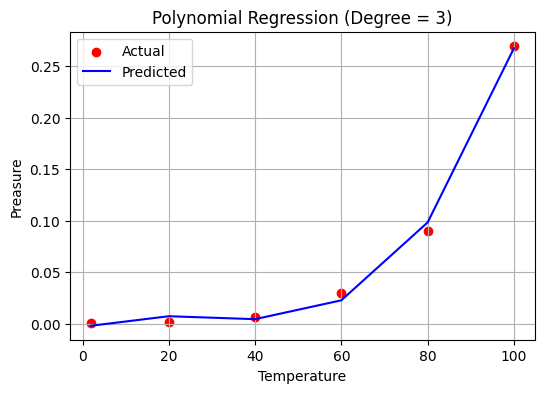

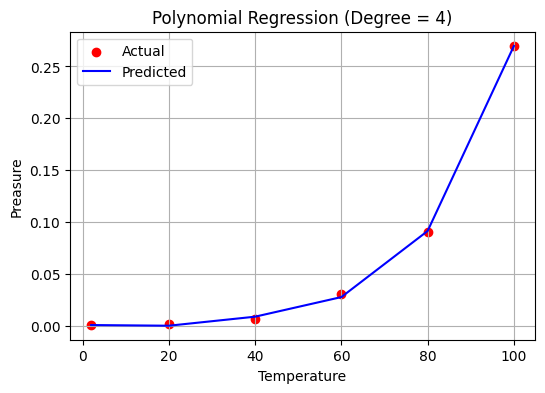

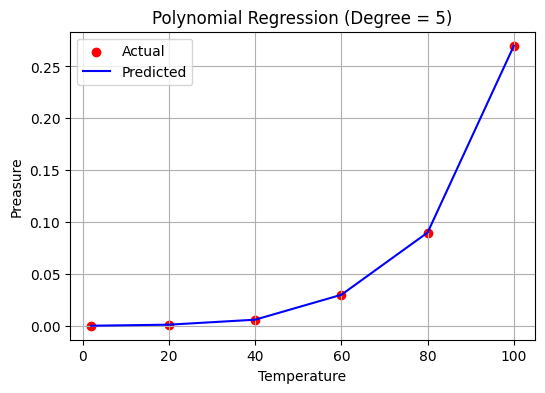

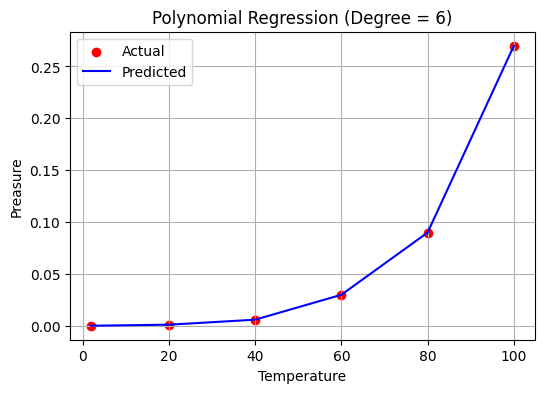

In [5]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

# Load the data
df = pd.read_csv('testdata.csv')
temperature = df.iloc[:, 1:2].values  # Input
preasure = df.iloc[:, 2].values      # Output

# Function to plot and observe for different polynomial degrees
def plot_polynomial_regression(degree):
    polyreg = PolynomialFeatures(degree=degree)
    X_poly = polyreg.fit_transform(temperature)

    linreg = LinearRegression()
    linreg.fit(X_poly, preasure)
    predicted_preasure = linreg.predict(X_poly)

    plt.figure(figsize=(6, 4))
    plt.scatter(temperature, preasure, color='red', label='Actual')
    plt.plot(temperature, predicted_preasure, color='blue', label='Predicted')
    plt.title(f'Polynomial Regression (Degree = {degree})')
    plt.xlabel('Temperature')
    plt.ylabel('Preasure')
    plt.legend()
    plt.grid(True)
    plt.show()

# Try different degrees and visualize
for degree in range(1, 7):
    plot_polynomial_regression(degree)


<ipython-input-6-07ccbc76e8dd>:13: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  df = pd.read_csv(url, names=column_names, delim_whitespace=True, na_values='?')


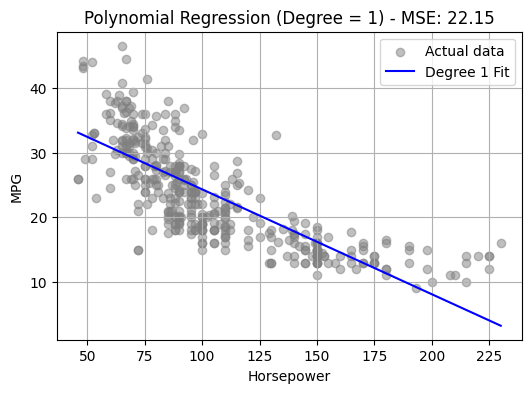

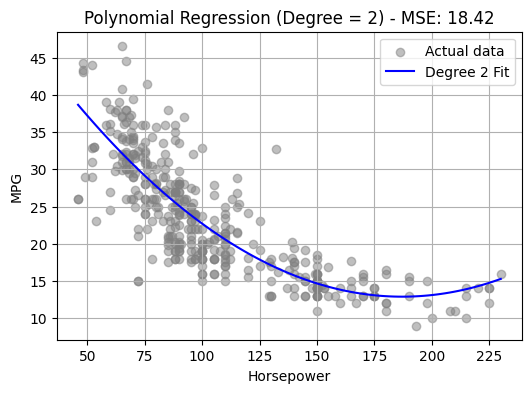

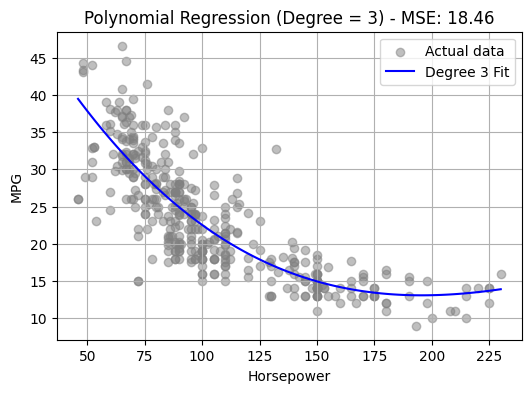

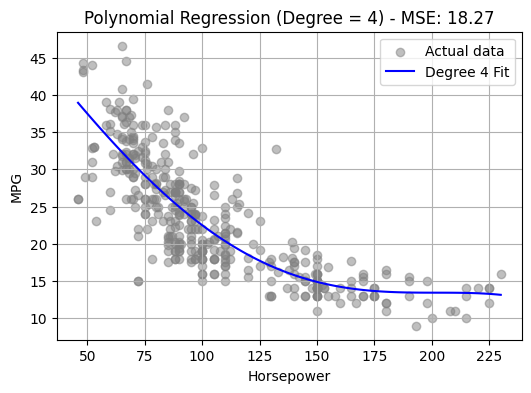

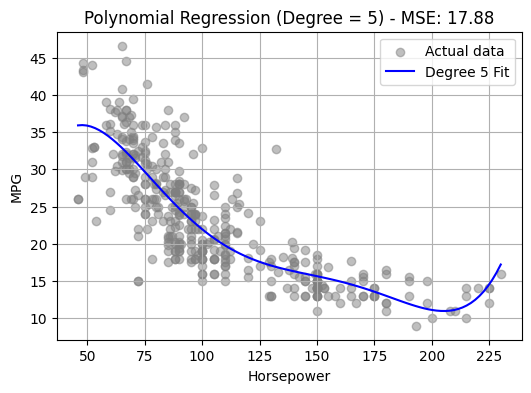

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Load dataset
url = 'http://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.data'
column_names = ['mpg', 'cylinders', 'displacement', 'horsepower', 'weight',
                'acceleration', 'model year', 'origin', 'car name']
df = pd.read_csv(url, names=column_names, delim_whitespace=True, na_values='?')

# Drop rows with missing values
df = df.dropna()

# Use horsepower as input and mpg as output
X = df[['horsepower']].values
y = df['mpg'].values

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Function to fit and plot polynomial regression for various degrees
def plot_polynomial_regression(degree):
    poly_features = PolynomialFeatures(degree=degree)
    X_poly_train = poly_features.fit_transform(X_train)
    X_poly_test = poly_features.transform(X_test)

    model = LinearRegression()
    model.fit(X_poly_train, y_train)

    y_pred = model.predict(X_poly_test)
    mse = mean_squared_error(y_test, y_pred)

    # For smooth plotting
    X_range = np.linspace(X.min(), X.max(), 100).reshape(-1, 1)
    X_range_poly = poly_features.transform(X_range)
    y_range_pred = model.predict(X_range_poly)

    plt.figure(figsize=(6, 4))
    plt.scatter(X, y, color='gray', label='Actual data', alpha=0.5)
    plt.plot(X_range, y_range_pred, color='blue', label=f'Degree {degree} Fit')
    plt.xlabel('Horsepower')
    plt.ylabel('MPG')
    plt.title(f'Polynomial Regression (Degree = {degree}) - MSE: {mse:.2f}')
    plt.legend()
    plt.grid(True)
    plt.show()

# Try degrees from 1 to 5
for degree in range(1, 6):
    plot_polynomial_regression(degree)
